In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv(r"../data/raw/indian_weather_data.csv")
df.head()

,city,lat,lon,temperature,weather_code,sunrise,sunset,moonrise,moonset,co,...,wind_speed,wind_degree,wind_dir,pressure,precip,humidity,cloudcover,feelslike,uv_index,visibility
0,New Delhi,28.600,77.200,21,143,07:05 AM,05:26 PM,01:04 AM,01:06 PM,1411.85,...,4,34,NE,1017,0.0,53,50,21,0,1
1,Mumbai,18.975,72.826,30,122,07:03 AM,06:03 PM,01:20 AM,01:29 PM,644.85,...,18,300,WNW,1011,0.0,35,0,32,0,4
2,Kolkata,22.570,88.370,21,143,06:07 AM,04:54 PM,12:16 AM,12:23 PM,457.85,...,8,3,N,1014,0.0,73,0,21,0,3
3,Chennai,13.083,80.283,26,143,06:22 AM,05:44 PM,12:48 AM,01:00 PM,275.85,...,19,31,NNE,1012,0.0,65,25,28,0,5
4,Bengaluru,12.983,77.583,24,113,06:32 AM,05:55 PM,12:59 AM,01:11 PM,243.85,...,9,76,ENE,1015,0.0,25,0,24,0,10


In [43]:
df.columns

Index(['city', 'lat', 'lon', 'temperature', 'weather_code', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'co', 'no2', 'o3', 'so2', 'pm2_5',
       'pm10', 'wind_speed', 'wind_degree', 'wind_dir', 'pressure', 'precip',
       'humidity', 'cloudcover', 'feelslike', 'uv_index', 'visibility'],
      dtype='object')

In [44]:
df.dtypes

city             object
lat             float64
lon             float64
temperature       int64
weather_code      int64
sunrise          object
sunset           object
moonrise         object
moonset          object
co              float64
no2             float64
o3                int64
so2             float64
pm2_5           float64
pm10            float64
wind_speed        int64
wind_degree       int64
wind_dir         object
pressure          int64
precip          float64
humidity          int64
cloudcover        int64
feelslike         int64
uv_index          int64
visibility        int64
dtype: object

In [45]:
columnas_horarias = ['sunrise', 'sunset', 'moonrise', 'moonset']

for col in columnas_horarias:
    df[col] = pd.to_datetime(df[col], format="%I:%M %p").dt.time


In [46]:
df['uv_index'].unique()

array([0])

In [47]:
df.drop(columns=['uv_index'], inplace=True)

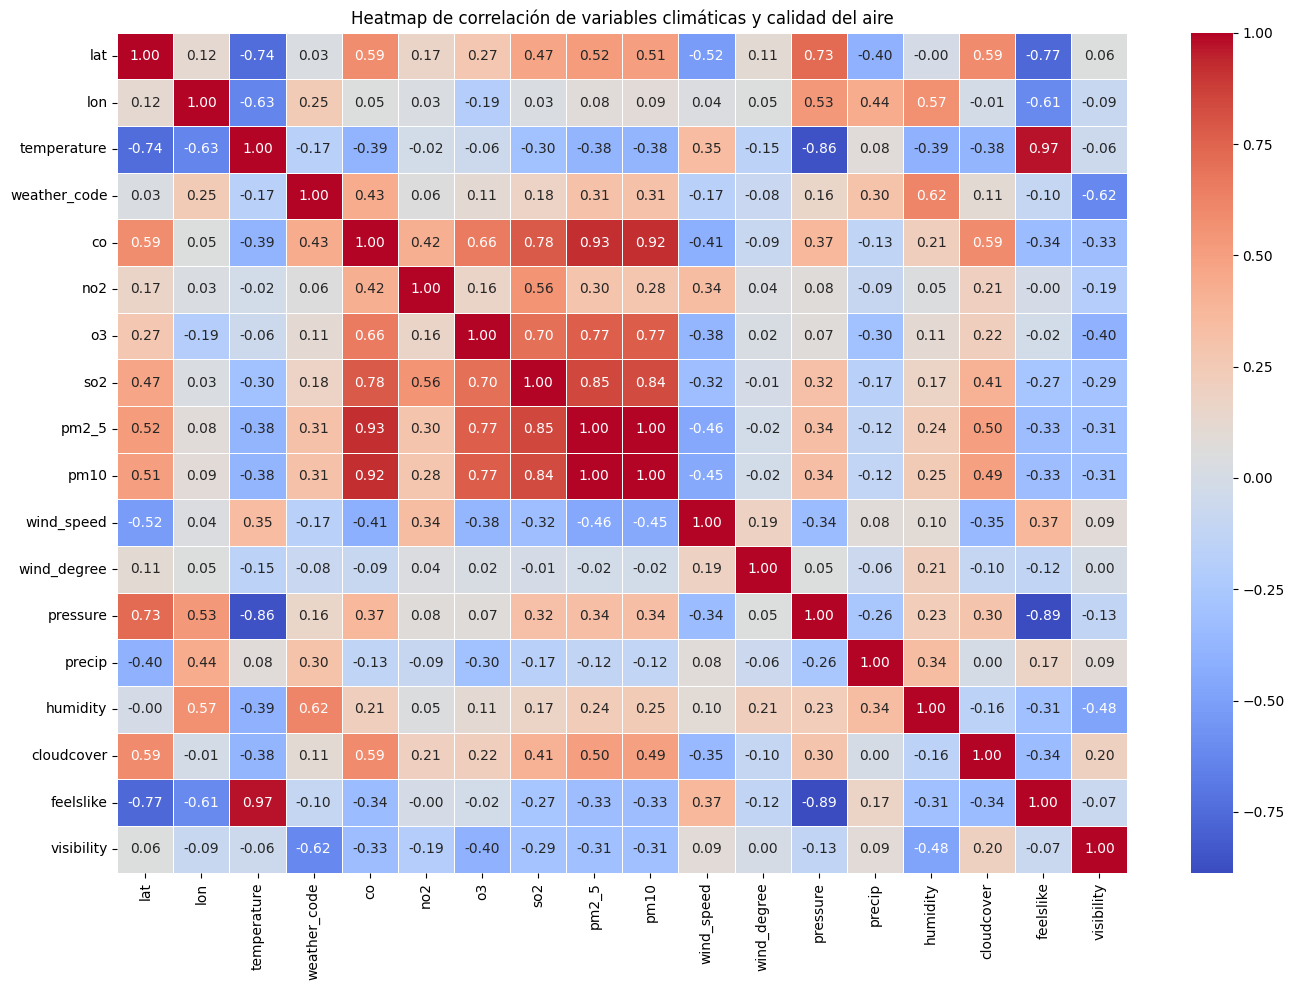

In [48]:
df_num = df.select_dtypes(include=["int64", "float64"])

corr = df_num.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)

plt.title("Heatmap de correlación de variables climáticas y calidad del aire")
plt.tight_layout()
plt.show()


<Axes: xlabel='pm2_5', ylabel='pm10'>

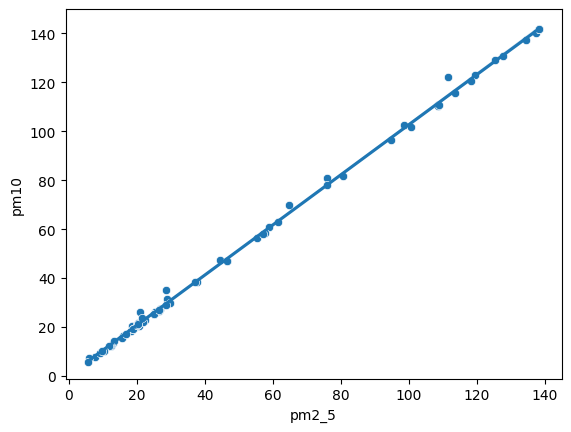

In [49]:
sns.scatterplot(data=df, x="pm2_5", y="pm10")
sns.regplot(data=df, x="pm2_5", y="pm10", scatter=False)


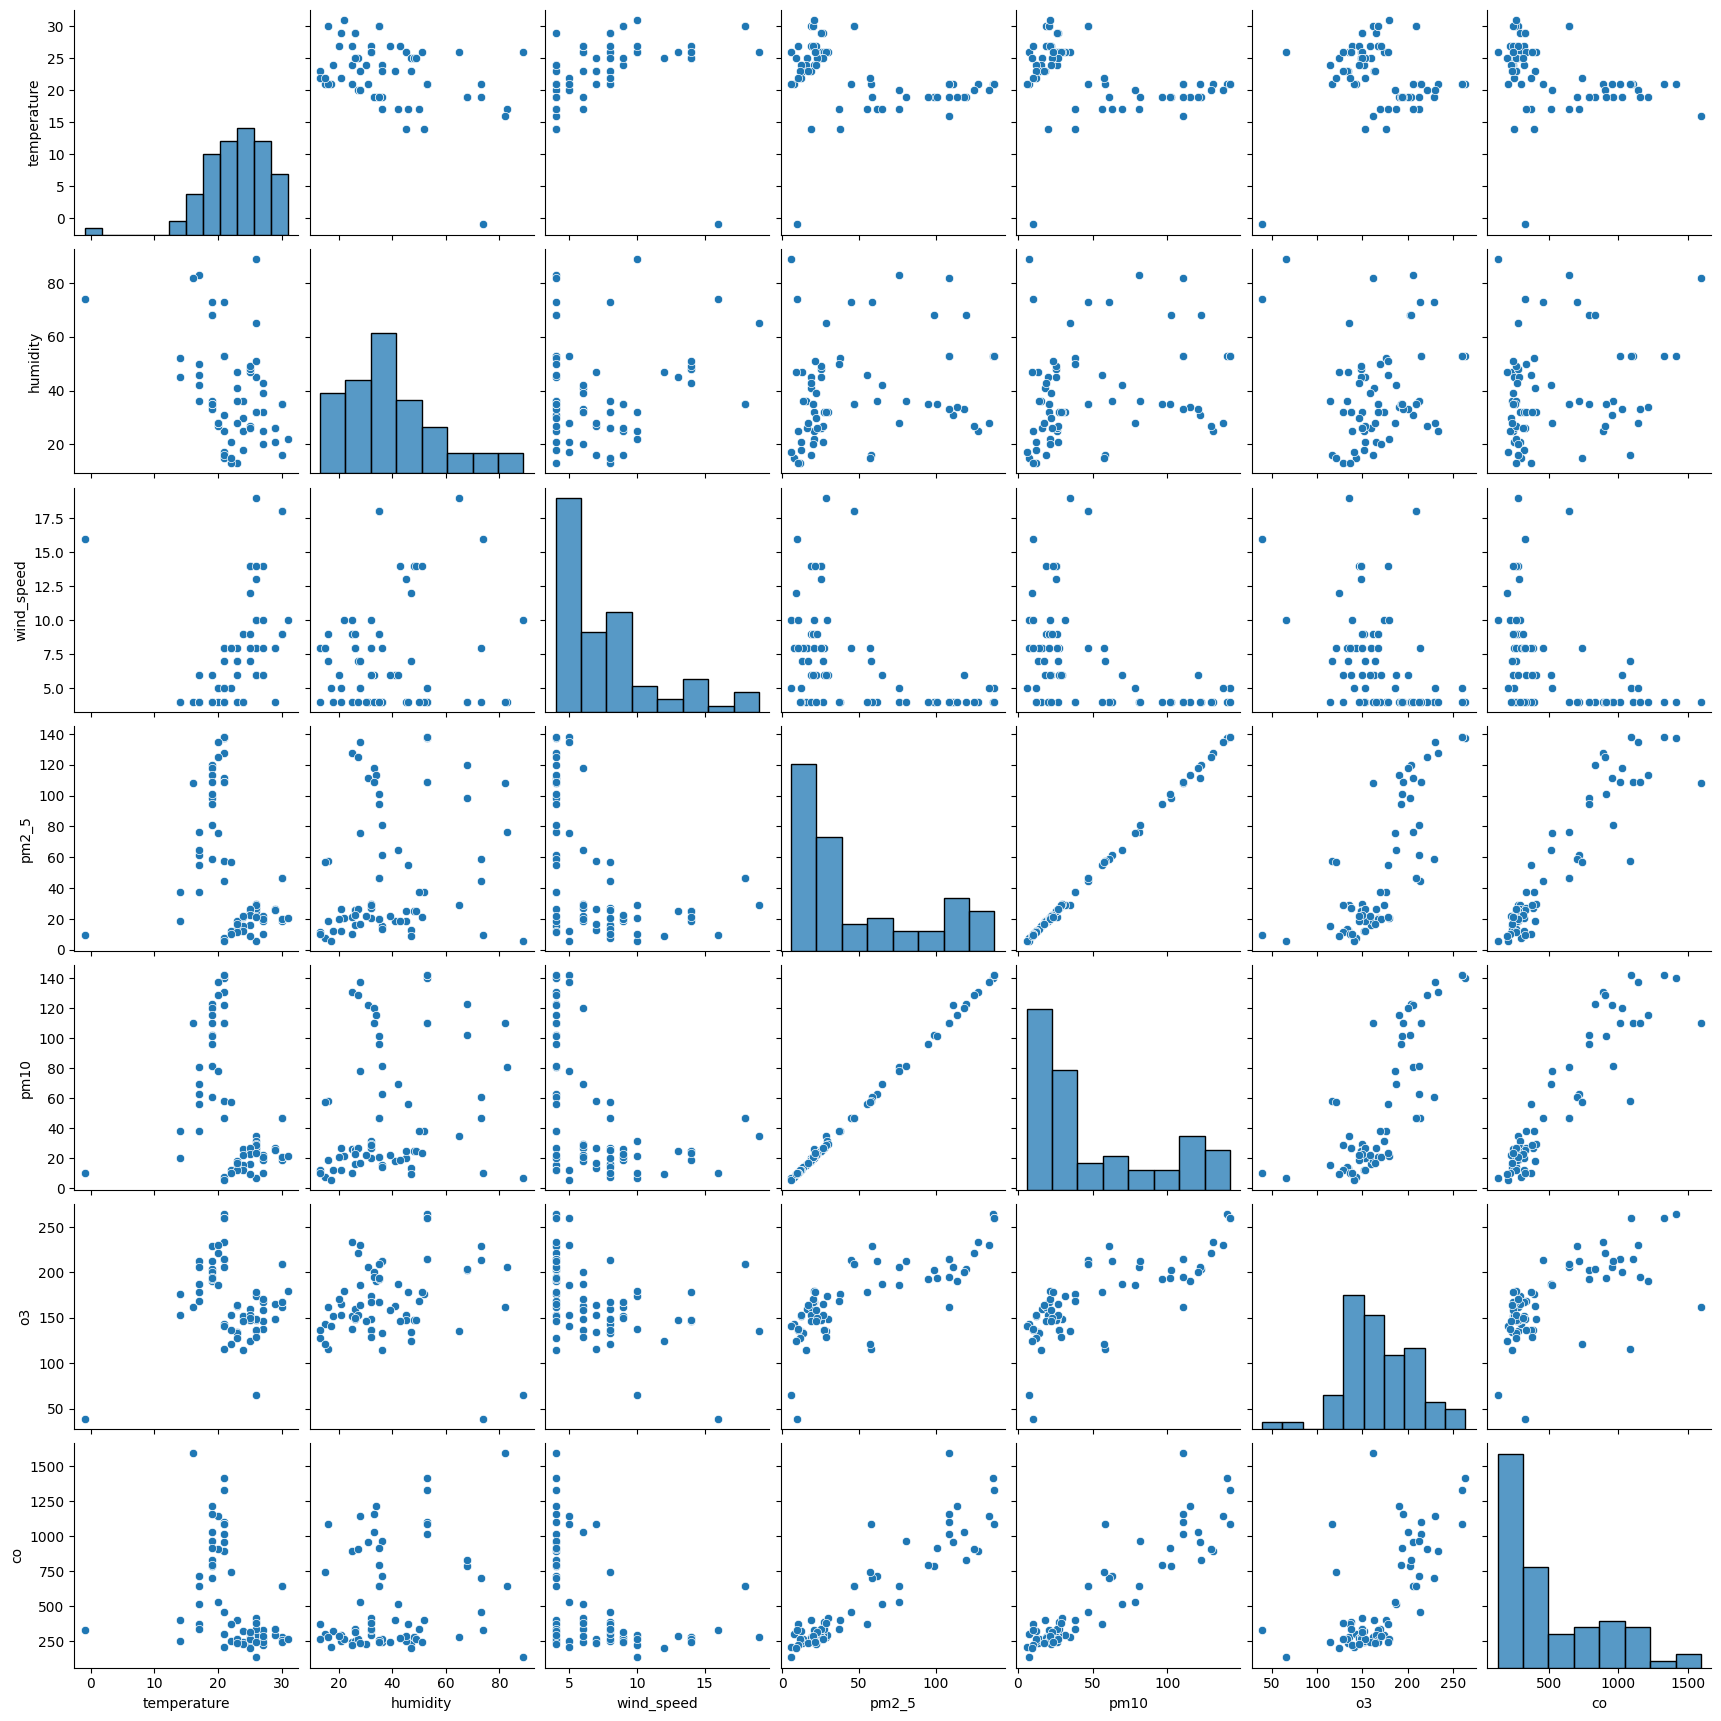

In [52]:
cols = ["temperature", "humidity", "wind_speed", "pm2_5", "pm10", "o3", "co"]
sns.pairplot(df[cols])
